In [63]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import colormaps as cm
import matplotlib.pyplot as plt
import plotly.express as px
import random
import os

In [2]:
def get_masked_image(path):
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = 5)
    sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

    _, thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.dilate(thresh, np.ones((3, 3), np.uint8))
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key = cv2.contourArea)

    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
    
    return image, mask

def get_average_color(image, mask):
    red = np.sum(image[:, :, 0] * mask[:, :, 0]) / np.sum(mask[:, :, 0])
    green = np.sum(image[:, :, 1] * mask[:, :, 1]) / np.sum(mask[:, :, 1])
    blue = np.sum(image[:, :, 2] * mask[:, :, 2]) / np.sum(mask[:, :, 2])

    return [red, green, blue]

In [3]:
average_pixels = []
path = "./data_orange_peels"
for subdir in os.listdir(path):
    for file in os.listdir(os.path.join(path, subdir)):
        if file.startswith("IMG"):
            image, mask = get_masked_image(os.path.join(path, subdir, file))
            average_color = get_average_color(image, mask/255)
            average_color.append(subdir)
            average_pixels.append(average_color)
average_pixels = np.array(average_pixels, dtype=np.float32)

Error occured with image 10/Thumbs.db: OpenCV(4.6.0) D:\bld\libopencv_1657598093230\work\modules\imgproc\src\deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'cv::Sobel'

Error occured with image 15/Thumbs.db: OpenCV(4.6.0) D:\bld\libopencv_1657598093230\work\modules\imgproc\src\deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'cv::Sobel'

Error occured with image 20/Thumbs.db: OpenCV(4.6.0) D:\bld\libopencv_1657598093230\work\modules\imgproc\src\deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'cv::Sobel'

Error occured with image 6/Thumbs.db: OpenCV(4.6.0) D:\bld\libopencv_1657598093230\work\modules\imgproc\src\deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'cv::Sobel'



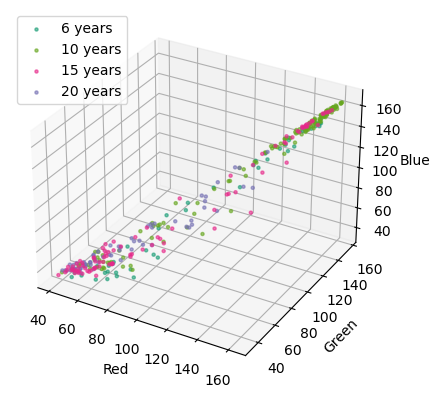

In [87]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
colormap = cm["Dark2"]
for label in [ 6, 10, 15, 20 ]:
    pixels = average_pixels[average_pixels[:, 3] == label]
    ax.scatter(
        pixels[:, 0],
        pixels[:, 1],
        pixels[:, 2],
        color = colormap(label % 6),
        label = "{} years".format(label),
        s = 5,
        alpha = 0.6
    )
ax.legend()
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()